In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.tri import Triangulation
from matplotlib import cm, patches, collections

from pynextsim import NextsimBin
from pynextsim.nextsim_mesh import NextsimMesh

from pynextsim.gmshlib import GmshMesh

from pynextsim.drifter_time_series import *

%matplotlib notebook

In [3]:
mesh_file='/data/experiments/run_330d_nodebug/mesh_final.bin'
mesh = NextsimMesh(mesh_file)

In [66]:
field_file='/data/experiments/run_330d_nodebug/field_final.bin'
field = NextsimBin(field_file)

In [50]:
drifters_file='/data/experiments/run_330d_nodebug/test_drifters.nc'

In [56]:
drft_datetimes, drft_indices, drft_data = read_nextsim_drifter_netcdf_file(drifters_file)

In [61]:
drft_c = DrifterTimeSeries(datetimes=drft_datetimes, indices=drft_indices, data=drft_data)

In [63]:
[xmin,xmax,ymin,ymax]=drft_c.get_xy_extent()

In [65]:
print(xmin,xmax,ymin,ymax)

-1707981.123168879 1009473.1907321878 -1122643.8316641136 932904.7611514851


Plot field M_VT (quiver)


<IPython.core.display.Javascript object>


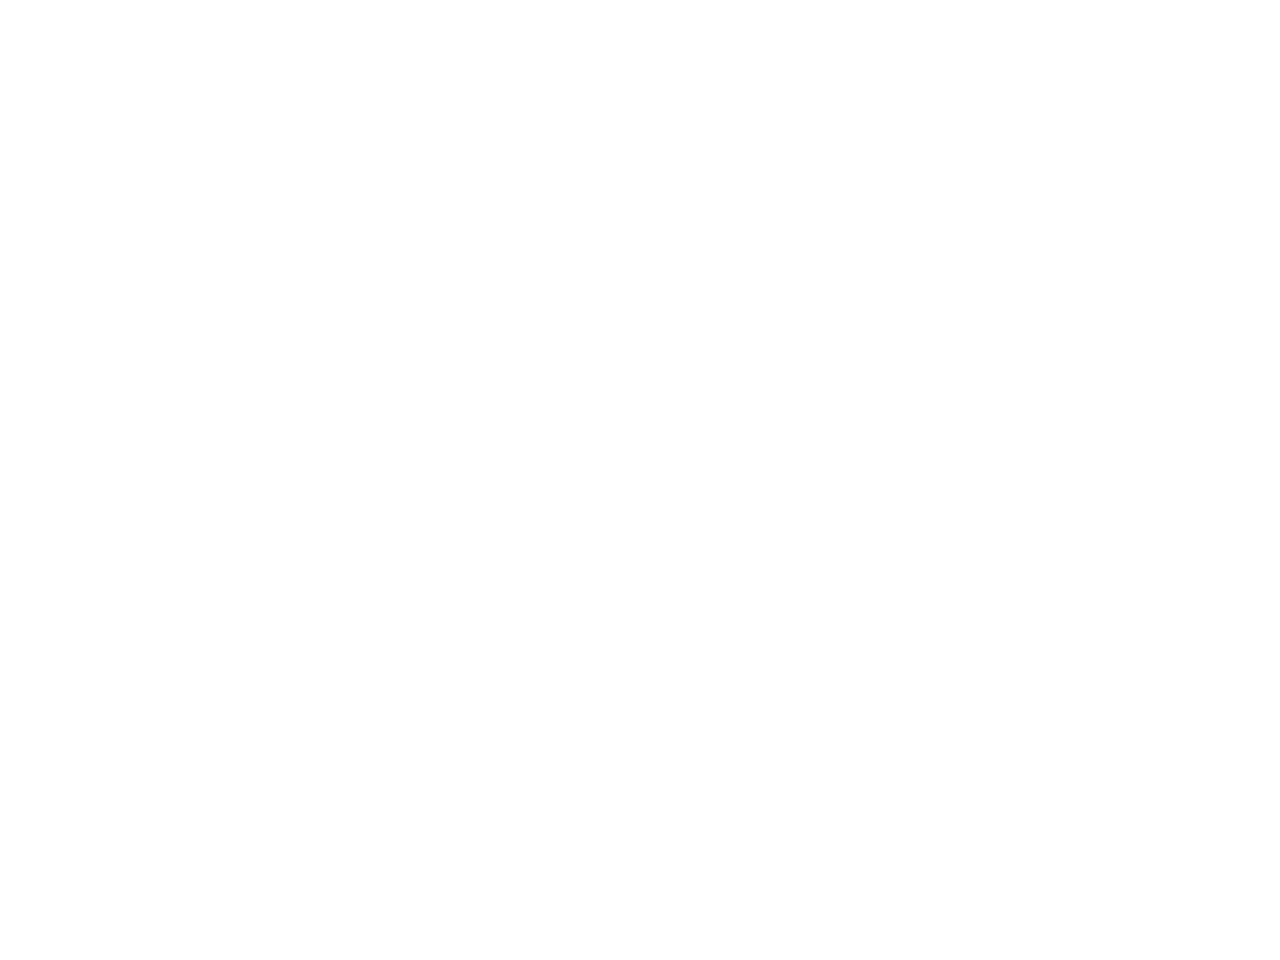

Plot 81 trajectories


<IPython.core.display.Javascript object>


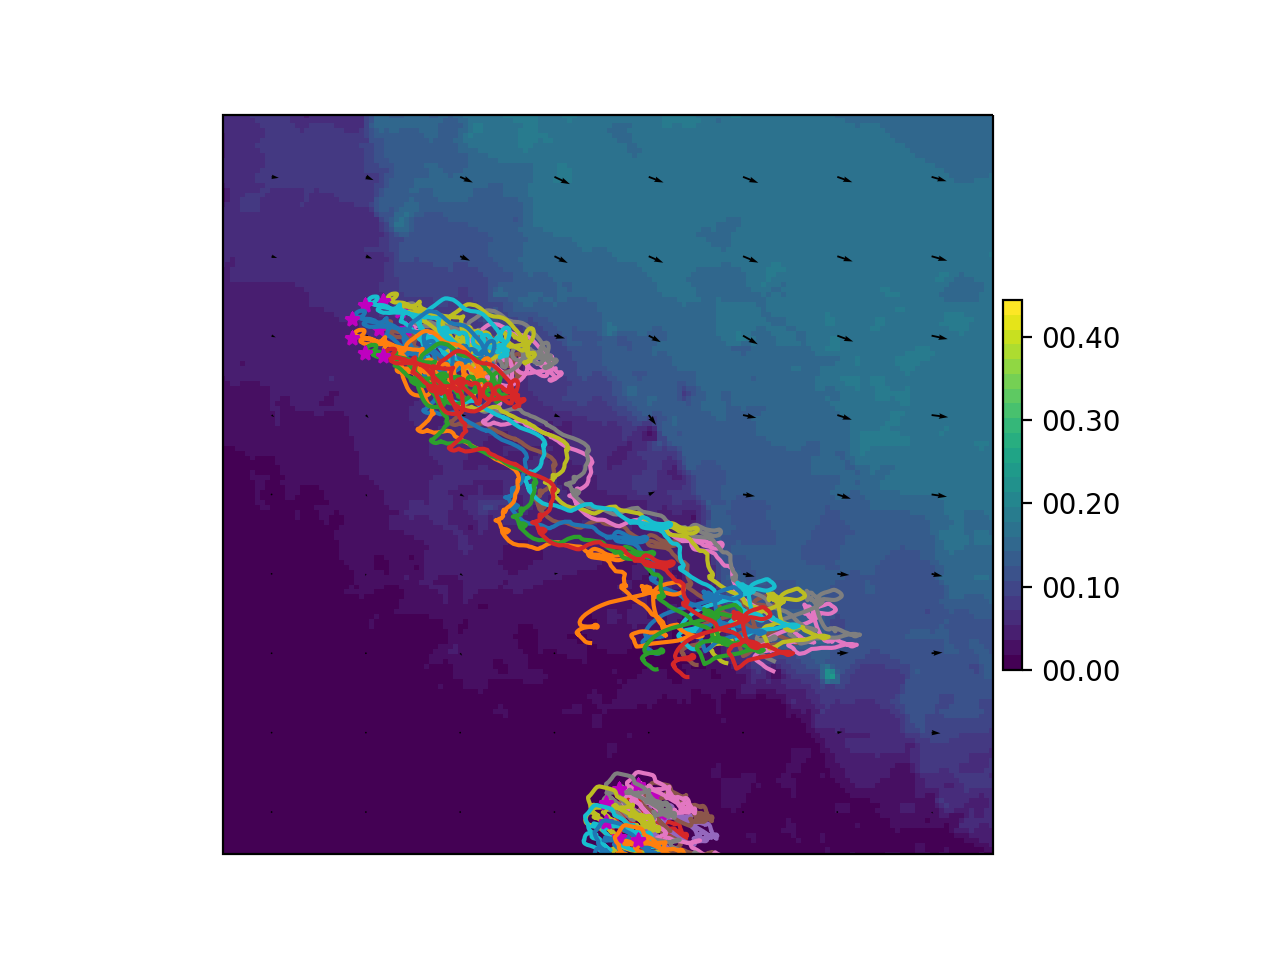

In [69]:
drft_c.overlay_trajectories_on_model_field(field_file)

In [15]:
import swarp_funs.mod_netcdf_utils as mnu

In [17]:
?mnu

In [20]:
from netCDF4 import Dataset as ncopen

nc=ncopen(drifters_file)
            

In [21]:
print(nc.dimensions)

{'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1321, 'nv': <class 'netCDF4._netCDF4.Dimension'>: name = 'nv', size = 2, 'x': <class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 391, 'y': <class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 326}


In [22]:
time = nc.variables['time']

In [34]:
fmt  = '%Y-%m-%d %H:%M:%S'
tu        = time.units
print(tu)

days since 1900-01-01 00:00:00


In [36]:
from netcdftime import utime
?utime

In [37]:
time_converter = utime(tu,calendar=time.calendar)

In [40]:
time_converter.units.lower()

'days'

In [42]:
arr             = time[:]
datetimes  = []
timevalues = []
Unit = time_converter.units.lower()

In [44]:
from datetime import datetime,timedelta


In [45]:
        for i, tval in enumerate(arr):
            if isinstance(tval, np.int32):
                # can be problems if int32 format
                tval  = int(tval)
            try:
                cdate = time_converter.num2date(tval).strftime(fmt)
            except ValueError:
                # might get errors if close to end/start of month
                # eg CS2-SMOS
                tval=round(float(tval))
                cdate = time_converter.num2date(tval).strftime(fmt)
            dto    = datetime.strptime(cdate, fmt)         # now a proper datetime object
            datetimes.append(dto)

            if i==0:
                reftime  = dto

            tdiff = (dto-reftime).total_seconds()
            if Unit=='seconds':
                timevalues.append(tdiff/3600.)         # convert to hours for readability
                timeunits = 'hour'
            elif Unit=='hours':
                timevalues.append(tdiff/3600.)         # keep as hours
                timeunits = 'hour'
            elif Unit=='days':
                timevalues.append(tdiff/3600./24.)    # keep as days
                timeunits = 'day'

        number_of_time_records    = len(datetimes)

In [46]:
number_of_time_records 

1321

In [47]:
datetimes

[datetime.datetime(2006, 2, 1, 0, 0),
 datetime.datetime(2006, 2, 1, 6, 0),
 datetime.datetime(2006, 2, 1, 12, 0),
 datetime.datetime(2006, 2, 1, 18, 0),
 datetime.datetime(2006, 2, 2, 0, 0),
 datetime.datetime(2006, 2, 2, 6, 0),
 datetime.datetime(2006, 2, 2, 12, 0),
 datetime.datetime(2006, 2, 2, 18, 0),
 datetime.datetime(2006, 2, 3, 0, 0),
 datetime.datetime(2006, 2, 3, 6, 0),
 datetime.datetime(2006, 2, 3, 12, 0),
 datetime.datetime(2006, 2, 3, 18, 0),
 datetime.datetime(2006, 2, 4, 0, 0),
 datetime.datetime(2006, 2, 4, 6, 0),
 datetime.datetime(2006, 2, 4, 12, 0),
 datetime.datetime(2006, 2, 4, 18, 0),
 datetime.datetime(2006, 2, 5, 0, 0),
 datetime.datetime(2006, 2, 5, 6, 0),
 datetime.datetime(2006, 2, 5, 12, 0),
 datetime.datetime(2006, 2, 5, 18, 0),
 datetime.datetime(2006, 2, 6, 0, 0),
 datetime.datetime(2006, 2, 6, 6, 0),
 datetime.datetime(2006, 2, 6, 12, 0),
 datetime.datetime(2006, 2, 6, 18, 0),
 datetime.datetime(2006, 2, 7, 0, 0),
 datetime.datetime(2006, 2, 7, 6, 0),


In [ ]:
vname='indice'
time_index=0
vbl0=nc.variables[vname]
indices=